In [1]:
import tarfile
import os
import numpy as np
import h5py

import matplotlib.pyplot as plt

In [ ]:
! sudo kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

In [ ]:
#Unzipping file
for file in os.listdir('./'):
    if (file.endswith("tar.gz")):
        tar = tarfile.open(file)
        tar.extractall()
        tar.close()

In [2]:
pictures = np.genfromtxt('./fer2013/fer2013.csv' , delimiter = ','  , dtype=  None)
pictures.shape

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


(35888, 3)

((1, 2304), (1, 1), (1, 2304), (1, 1))
Training
(array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
       [ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       ...,
       [ 74.,  81.,  87., ..., 188., 187., 187.],
       [222., 227., 203., ..., 136., 136., 134.],
       [195., 199., 205., ...,   6.,  15.,  38.]]), array([1., 0., 0., ..., 4., 0., 4.]))


((28710, 2304), (28710,), (7179, 2304), (7179,))

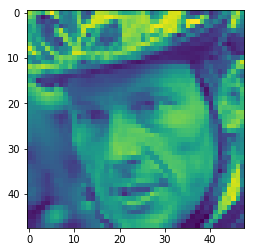

In [3]:
x_training , y_training, x_test , y_test = np.ones((1,2304)) , np.ones((1,1)) , np.ones((1,2304)) , np.ones((1,1))
print(x_training.shape,  y_training.shape , x_test.shape , y_test.shape)
converter_pic = lambda z : np.fromstring( z , dtype = float, sep = " ")

temp = np.fromstring(pictures[20][1] , dtype = float , sep = ' ')
temp = temp.reshape(48,48)
plt.imshow(temp)
print(pictures[20][2])

for picture in pictures:
    if picture[0] == "emotion":
        pass
    elif picture[2] == "Training":
        x_training = np.r_[x_training, converter_pic(picture[1]).reshape(1,-1)]
        y_training = np.append(y_training, int(picture[0]))
    else:
        x_test = np.r_[x_test, converter_pic(picture[1]).reshape(1,-1)]
        y_test = np.append(y_test, int(picture[0]))
    
print(x_training , y_training)
x_training.shape,  y_training.shape , x_test.shape , y_test.shape


In [4]:
#with h5py.File('./data_emotion.h5' , 'w') as hdf:
    hdf.create_dataset('x_test' , data = x_test)
    hdf.create_dataset('y_test' , data = y_test)
    hdf.create_dataset('x_training' , data = x_training)
    hdf.create_dataset('y_training' , data = y_training)

In [5]:
with h5py.File('./data_emotion.h5' , 'r') as hdf:
  ls = list(hdf.keys())
  print("list", ls)

('list', [u'x_test', u'x_training', u'y_test', u'y_training'])


In [ ]:
def sigmoid(X):
    return 1.0/(1+np.exp(-X))

def costFunction(weigths):
    return 
    